# Marketing Data Analysis
    a.	Preprocess and clean if necessary.
    b.	Build a model predicting “churn”. 
    c.	Remember to comment your code and give rationales for models, algorithms, and approaches. 


## Import Packages

In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings("ignore")

import os
path=os.environ['USERPROFILE']+r'\OneDrive\BDA2'

## Load data

In [2]:
import pyodbc
import urllib
import sqlalchemy

'''connect to datahub'''

params_datahub = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
                                 "SERVER=localhost\SQLEXPRESS;"
                                 "DATABASE=datahub;"
                                 "UID=sa;"
                                 "PWD=user1")

engine_datahub = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params_datahub))

In [4]:
df=pd.read_sql_table(r"marketing_churn",engine_datahub)
# df=pd.read_excel("C:\Business_Data_Analysis\data\marketing_churn.xlsx")
df.head()
#dataframe: df
# a*x1, b*x2...= y (Exited)  model 
# a*x1+b*x2... = probability of Exited

RowNumber  CustomerId   Surname  CreditScore Geography Gender  Age  Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
0          7    15592531  Bartlett          822    France   Male   50       7      0.0              2          1               1         10062.80       0
1         21    15577657  McDonald          732    France   Male   41       8      0.0              2          1               1        170886.17       0
2         77    15614049        Hu          664    France   Male   55       8      0.0              2          1               1        139161.64       0
3         94    15640635     Capon          769    France   Male   29       8      0.0              2          1               1        172290.61       0
4        142    15724944      Tien          663    France   Male   34       7      0.0              2          1               1        180427.24       0

## Exploratory Data Analysis(EDA)



### Check missing values and shape
Normally we need to clean the samples, i,e, impute missing values but in this case the data is pretty clean with no missing values. We also check the shape to make sure it matches the meta data info in the document. 

In [5]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


(None, (10000, 14))

### Check Churn ratio
The samples are balanced so we can use "Accuracy" metric to measure the performance of the model

<AxesSubplot:>

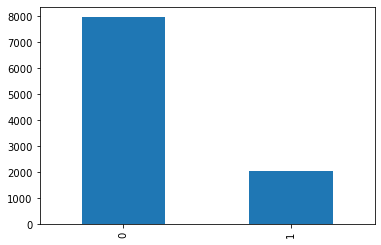

In [7]:
target='Exited'
df[target].value_counts().plot(kind='bar')

### Describe the data

Categorical features/Dimensions 

In [8]:
droplist='Surname'
cat_cols=df.select_dtypes(object).drop(droplist,axis=1).columns.tolist()
cat_cols

['Geography', 'Gender']

In [9]:
df.select_dtypes(object).drop(droplist,axis=1).columns.tolist()

['Geography', 'Gender']

In [12]:
help(df.select_dtypes)

Help on method select_dtypes in module pandas.core.frame:

select_dtypes(include=None, exclude=None) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Return a subset of the DataFrame's columns based on the column dtypes.
    
    Parameters
    ----------
    include, exclude : scalar or list-like
        A selection of dtypes or strings to be included/excluded. At least
        one of these parameters must be supplied.
    
    Returns
    -------
    DataFrame
        The subset of the frame including the dtypes in ``include`` and
        excluding the dtypes in ``exclude``.
    
    Raises
    ------
    ValueError
        * If both of ``include`` and ``exclude`` are empty
        * If ``include`` and ``exclude`` have overlapping elements
        * If any kind of string dtype is passed in.
    
    See Also
    --------
    DataFrame.dtypes: Return Series with the data type of each column.
    
    Notes
    -----
    * To select all *numeric* types, use ``np.number

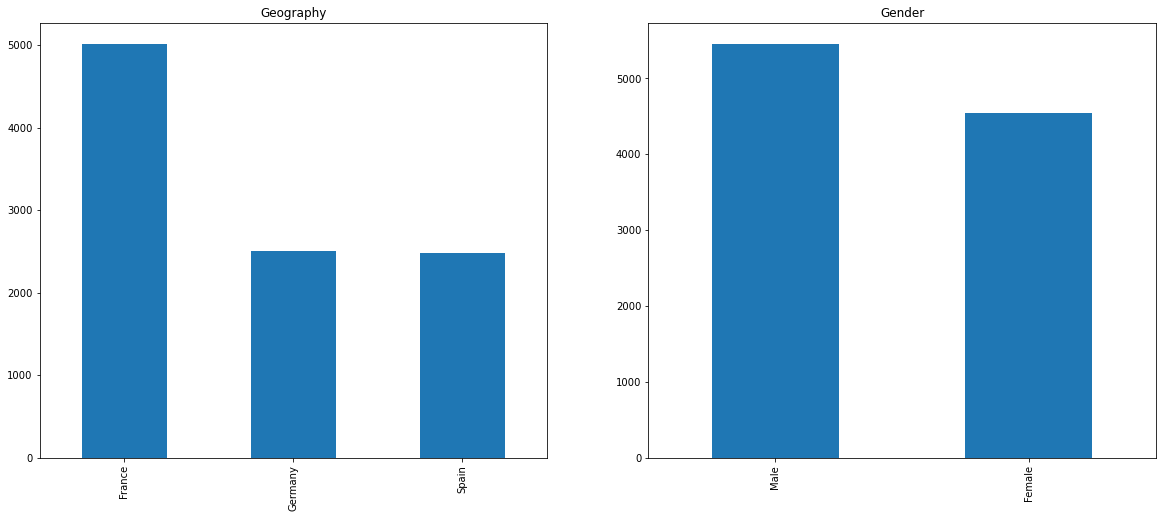

In [10]:
import matplotlib.pyplot as plt
categorical_features = cat_cols
fig, ax = plt.subplots(1, len(categorical_features))

for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind="bar", ax=ax[i],figsize=(20,8),rot=90,fontsize=10).set_title(categorical_feature)


Numeric data

#### Histogram
Histogram groups numeric data into bins, displaying the bins as segmented columns and summarize the distribution of a univariate data set. 

In [11]:
droplist=['RowNumber','CustomerId']
num_cols=df.select_dtypes('number').drop(droplist,axis=1).columns.tolist()
num_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

<AxesSubplot:xlabel='Age', ylabel='Density'>

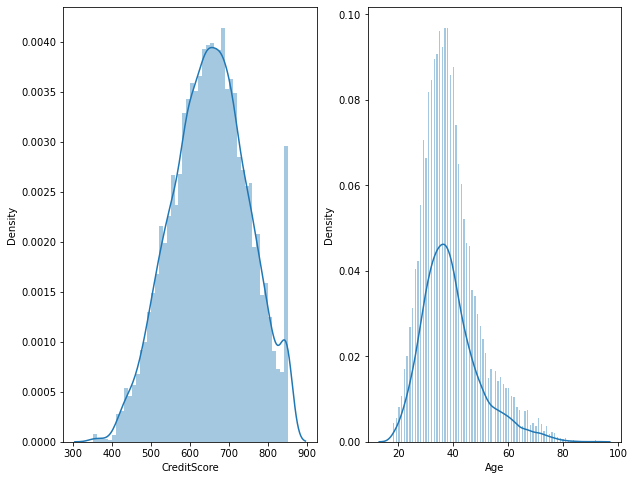

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10,8))

sns.distplot(df['CreditScore'], ax=ax[0],bins=50)
sns.distplot(df['Age'],ax=ax[1], bins=150)

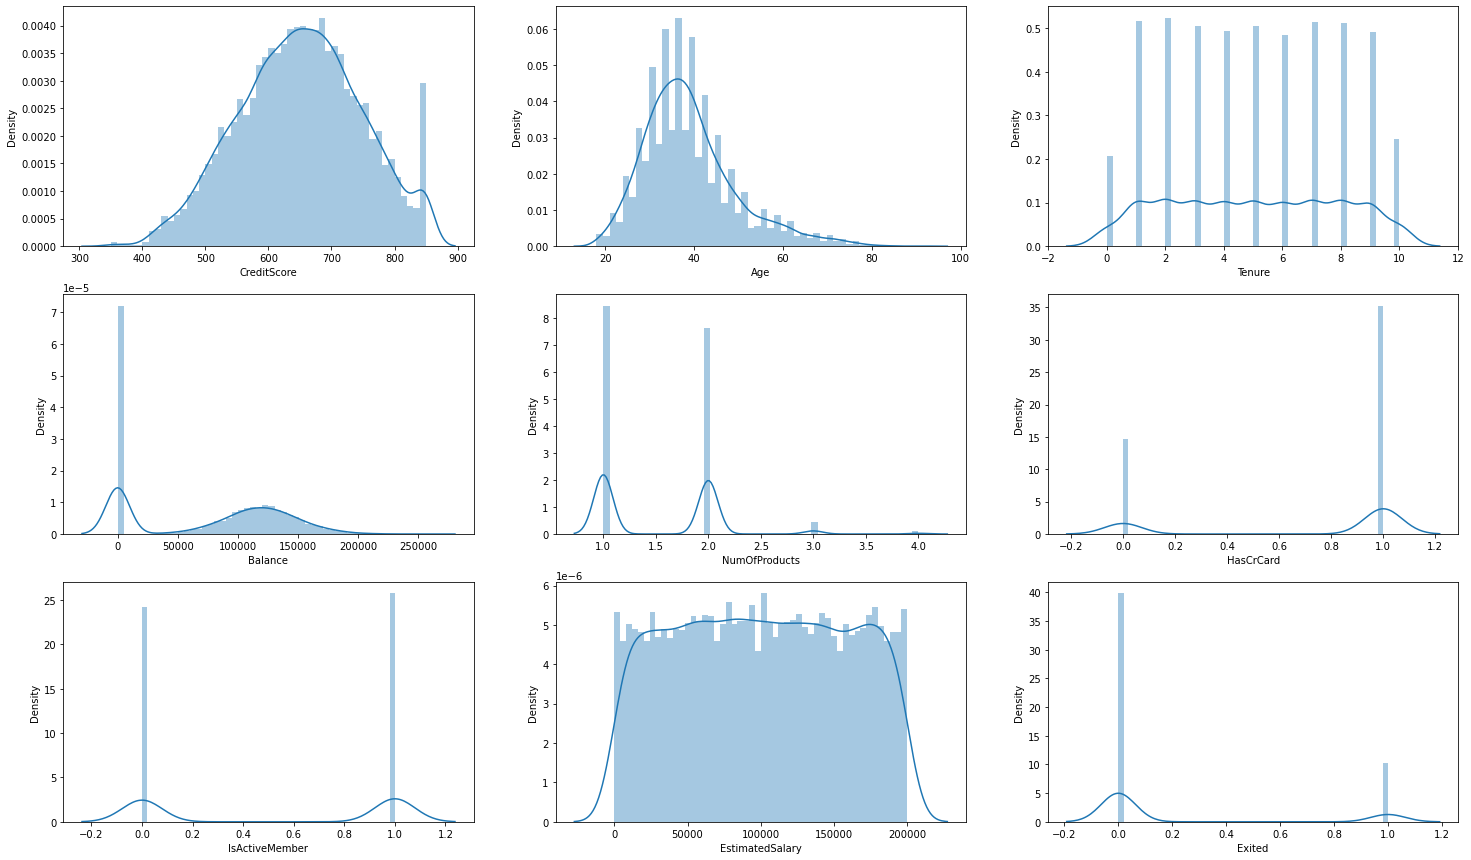

In [16]:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

fig, ax = plt.subplots(3,3, figsize=(25,15))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
            sns.distplot(df[df[num_cols].columns[i*3+j]], ax=ax[i][j],bins=50)
        
        
# for i in range(9):
#     print(i)
#     sns.distplot(df[df[num_cols].columns[i]], ax=ax[i],bins=50)        

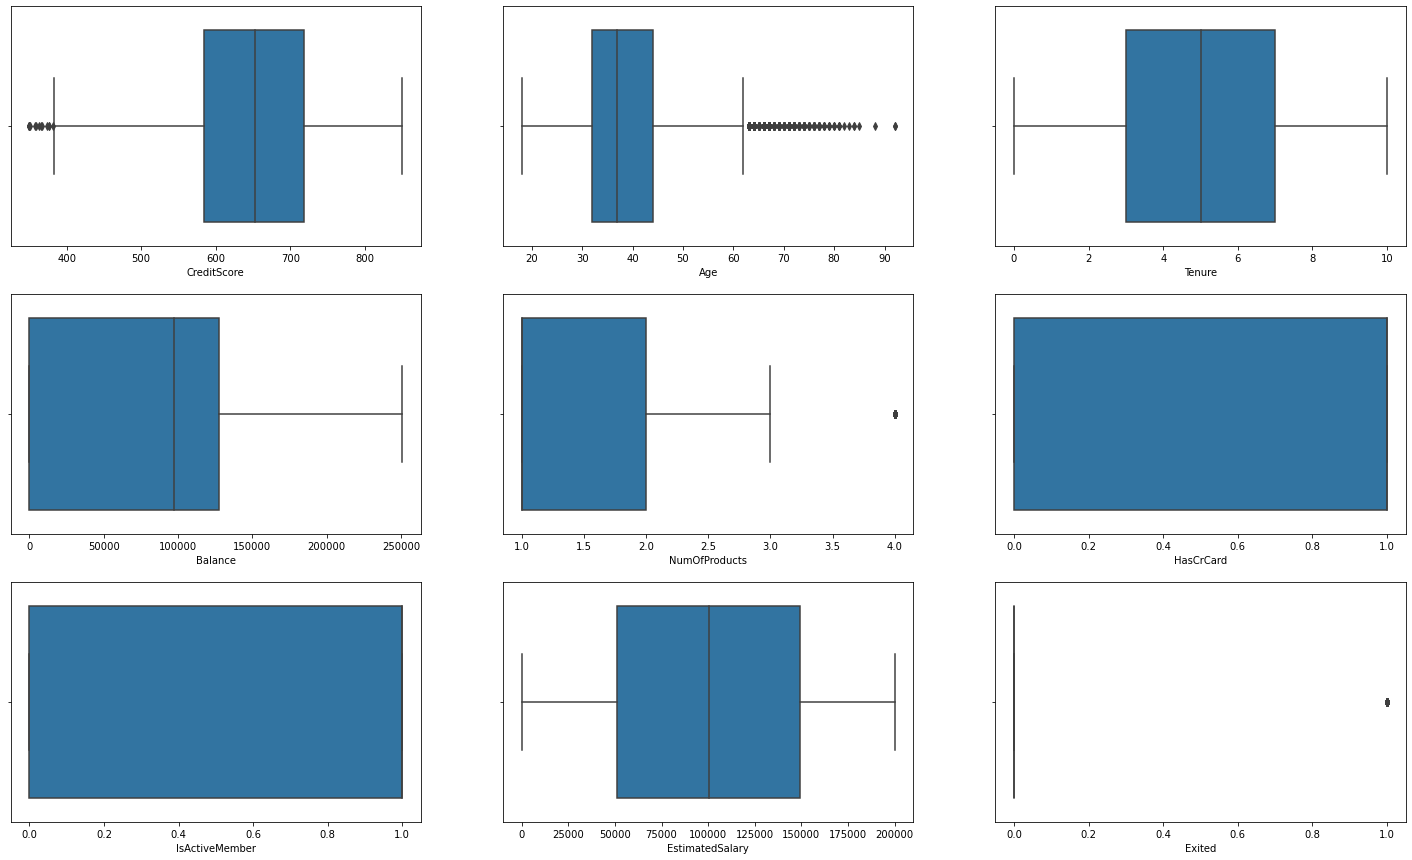

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

fig, ax = plt.subplots(3, 3, figsize=(25, 15))

#plot the features except LOCATION_ID and Risk
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
#         sns.boxplot(df[df[num_cols].columns[i*2+j]], ax=ax[i][j],orient='v',showfliers=False)
        sns.boxplot(df[df[num_cols].columns[i*3+j]], ax=ax[i][j],orient='v')

In [18]:
df.describe()
# from the "max" row we can see feature PARA_A, PARA_B,Money_Value,History have some potential outliers. 

RowNumber    CustomerId   CreditScore           Age        Tenure        Balance  NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary        Exited
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000  10000.00000    10000.000000     10000.000000  10000.000000
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   76485.889288       1.530200      0.70550        0.515100    100090.239881      0.203700
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   62397.405202       0.581654      0.45584        0.499797     57510.492818      0.402769
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000       0.000000       1.000000      0.00000        0.000000        11.580000      0.000000
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000       0.000000       1.000000      0.00000        0.000000     51002.110000      0.000000
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   97198.540000       1.000000      1.00000        1.000000    100193.915000      0.000000
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000  127644.240000       2.000000      1.00000        1.000000    149388.247500      0.000000
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000  250898.090000       4.000000      1.00000        1.000000    199992.480000      1.000000

### Clip, i.e. assigns values outside boundary to boundary values, the data to deal with outliers. 
 Outliers may distort how we see the data. They contain information too so it's a tradeoff; we lose some info but gain a better big picture of the data.

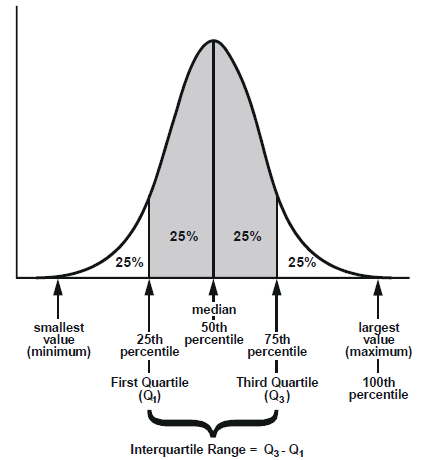

In [19]:
df[num_cols].clip(lower=df[num_cols].quantile(0.05), upper=df[num_cols].quantile(0.95),axis=1)

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
0             812   50       7       0.00              2          1               1         10062.80       0
1             732   41       8       0.00              2          1               1        170886.17       0
2             664   55       8       0.00              2          1               1        139161.64       0
3             769   29       8       0.00              2          1               1        172290.61       0
4             663   34       7       0.00              2          1               1        180427.24       0
...           ...  ...     ...        ...            ...        ...             ...              ...     ...
9995          750   38       5  151532.40              1          1               1         46555.15       0
9996          670   33       8  126679.69              1          1               1         39451.09       0
9997          739   58       2  101579.28              1          1               1         72168.53       0
9998          623   48       5  118469.38              1          1               1        158590.25       0
9999          516   35       9   57369.61              1          1               1        101699.77       0

[10000 rows x 9 columns]

In [20]:
df[num_cols]

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
0             822   50       7       0.00              2          1               1         10062.80       0
1             732   41       8       0.00              2          1               1        170886.17       0
2             664   55       8       0.00              2          1               1        139161.64       0
3             769   29       8       0.00              2          1               1        172290.61       0
4             663   34       7       0.00              2          1               1        180427.24       0
...           ...  ...     ...        ...            ...        ...             ...              ...     ...
9995          750   38       5  151532.40              1          1               1         46555.15       0
9996          670   33       8  126679.69              1          1               1         39451.09       0
9997          739   58       2  101579.28              1          1               1         72168.53       0
9998          623   48       5  118469.38              1          1               1        158590.25       0
9999          516   35      10   57369.61              1          1               1        101699.77       0

[10000 rows x 9 columns]

In [21]:
# here we use quantile 0.01 as lower limit and 0.99 upper.
df[num_cols]=df[num_cols].clip(lower=df[num_cols].quantile(0.01), upper=df[num_cols].quantile(0.99),axis=1)
df.describe()

RowNumber    CustomerId   CreditScore          Age        Tenure        Balance  NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary        Exited
count  10000.00000  1.000000e+04  10000.000000  10000.00000  10000.000000   10000.000000   10000.000000  10000.00000    10000.000000     10000.000000  10000.000000
mean    5000.50000  1.569094e+07    650.743200     38.89760      5.012800   76369.720704       1.524200      0.70550        0.515100    100089.576990      0.203700
std     2886.89568  7.193619e+04     96.115361     10.31522      2.892174   62172.016053       0.560933      0.45584        0.499797     57477.436802      0.402769
min        1.00000  1.556570e+07    432.000000     21.00000      0.000000       0.000000       1.000000      0.00000        0.000000      1842.825300      0.000000
25%     2500.75000  1.562853e+07    584.000000     32.00000      3.000000       0.000000       1.000000      0.00000        0.000000     51002.110000      0.000000
50%     5000.50000  1.569074e+07    652.000000     37.00000      5.000000   97198.540000       1.000000      1.00000        1.000000    100193.915000      0.000000
75%     7500.25000  1.575323e+07    718.000000     44.00000      7.000000  127644.240000       2.000000      1.00000        1.000000    149388.247500      0.000000
max    10000.00000  1.581569e+07    850.000000     72.00000     10.000000  185967.985400       3.000000      1.00000        1.000000    198069.734500      1.000000

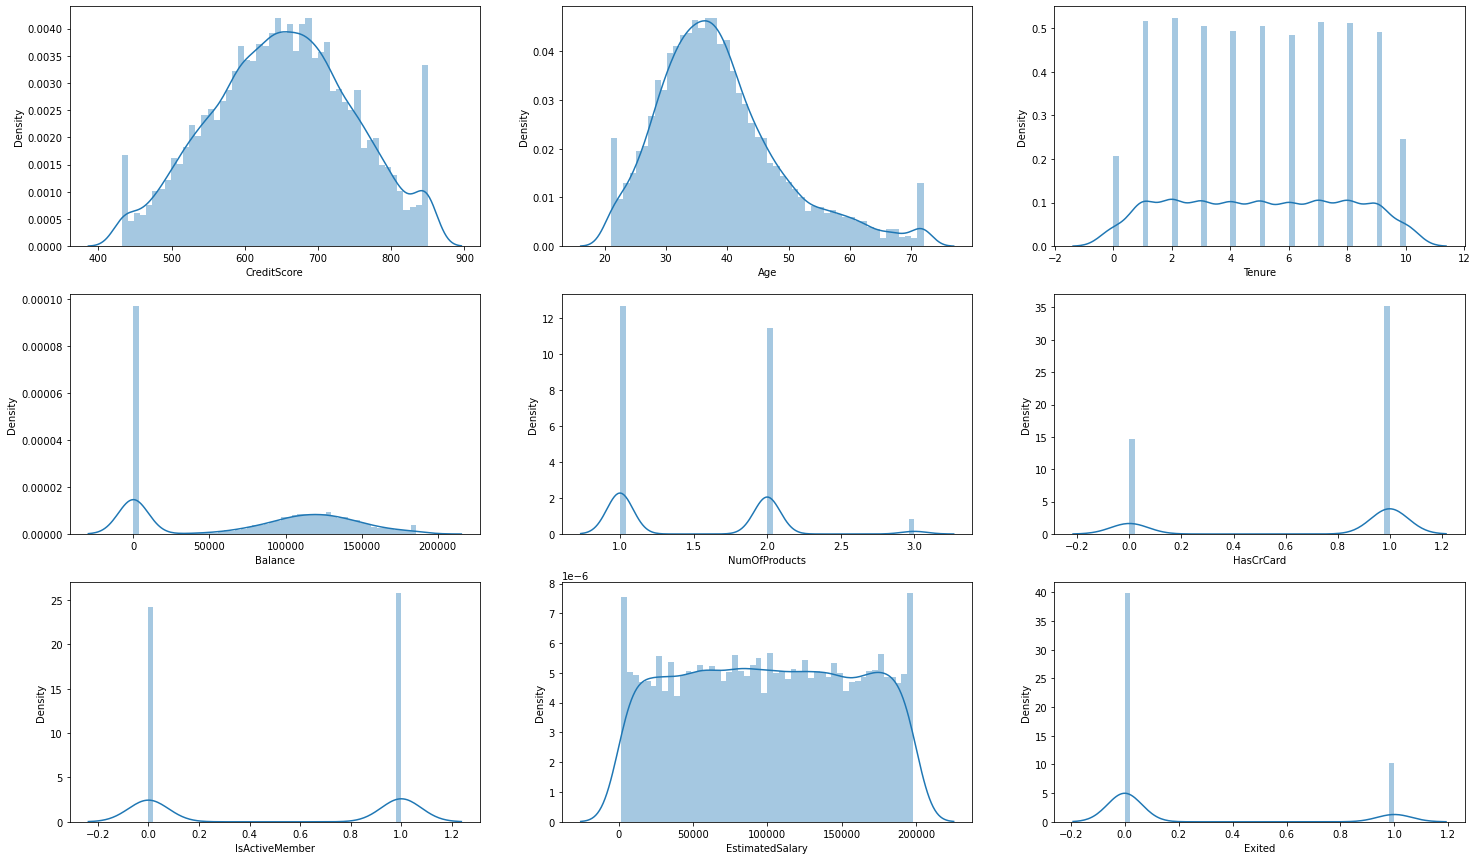

In [22]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
fig, ax = plt.subplots(3, 3, figsize=(25, 15))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.distplot(df[df[num_cols].columns[i*3+j]], ax=ax[i][j],bins=50)

### Boxplot the data
Boxplot shows the shape of the distribution, its central value, and its variability

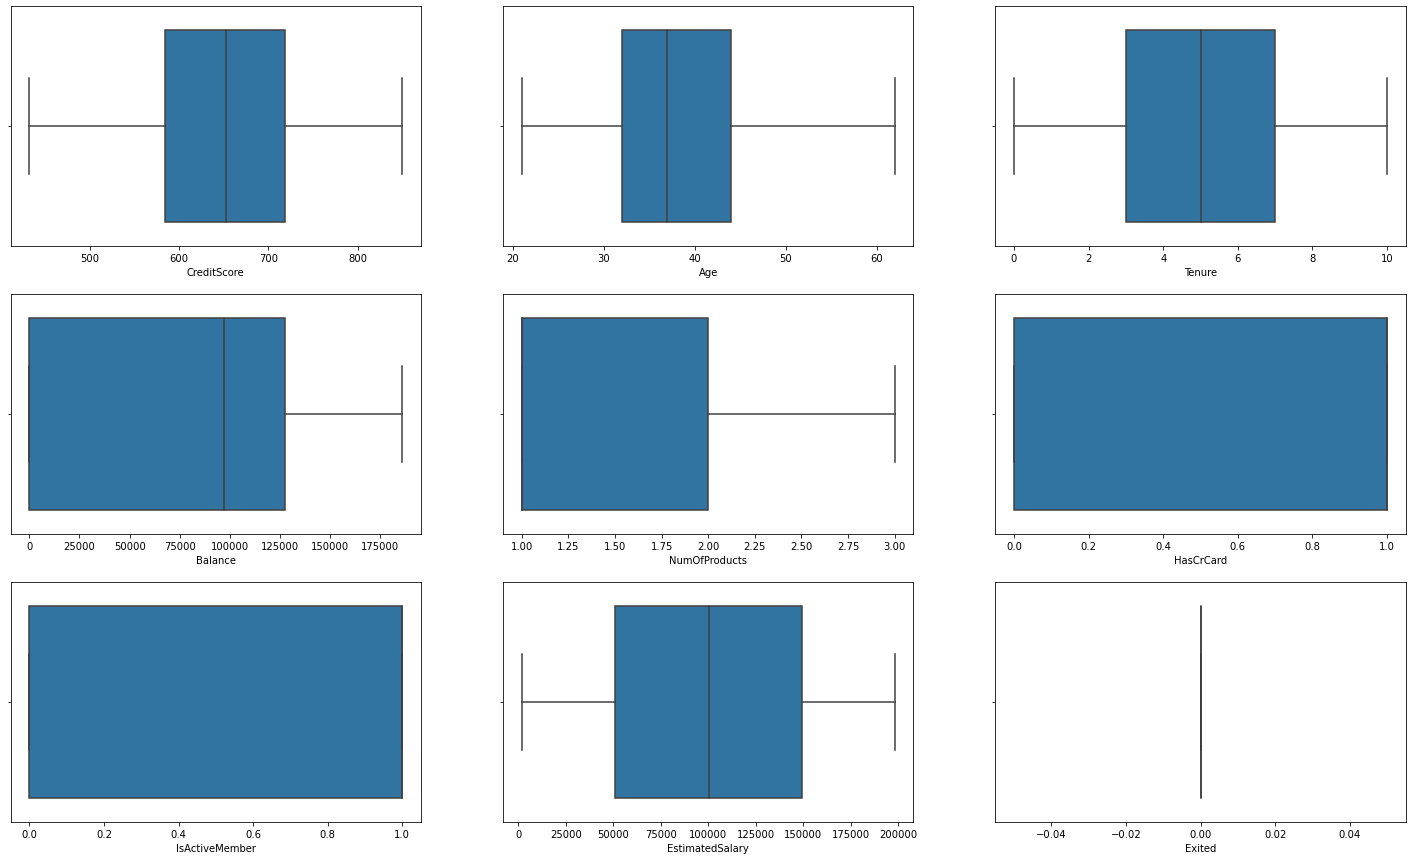

In [23]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

fig, ax = plt.subplots(3, 3, figsize=(25, 15))

#plot the features except LOCATION_ID and Risk
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.boxplot(df[df[num_cols].columns[i*3+j]], ax=ax[i][j],orient='v',showfliers=False)

#### Explain the Boxplots:
The boxplots tell similar story as the Histograms. None of the distributions seem normal.

### Correlation heatmap
Correlation heatmap allows us to see relations between features/attributes. The higher the absolute coefficient, the stronger the correlation is. 

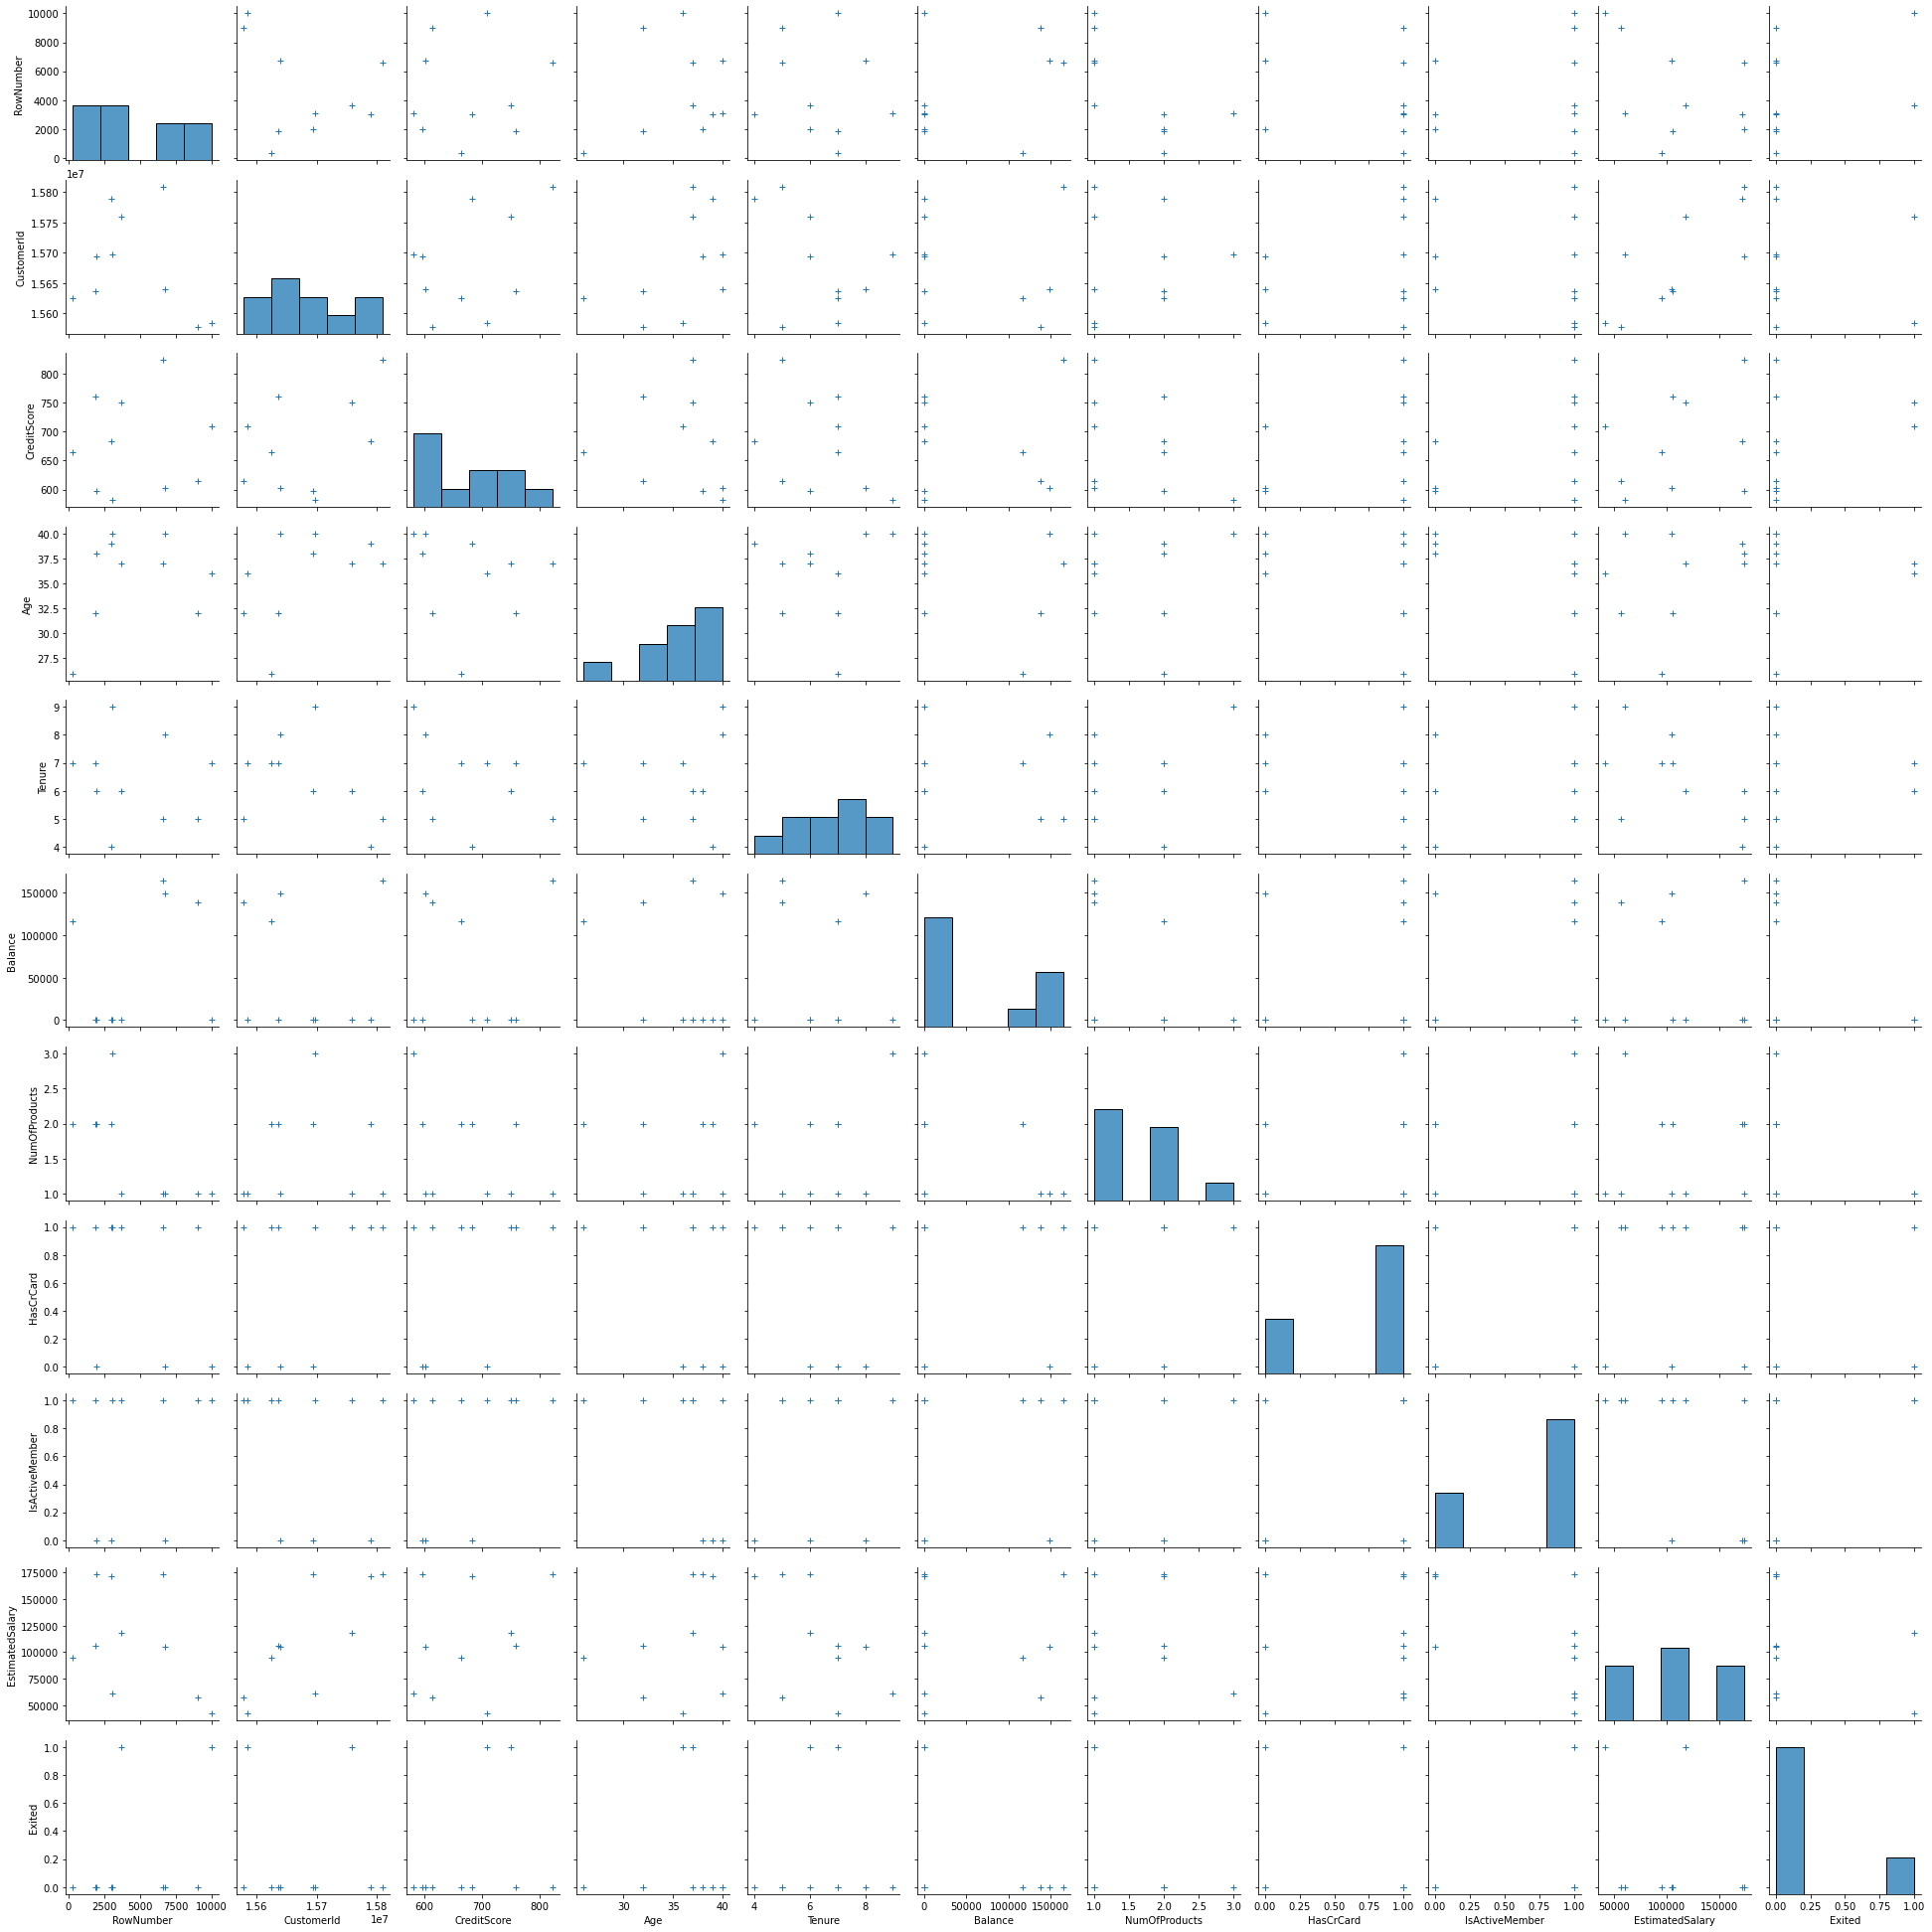

In [24]:
import seaborn as sns
# df=df.query('`Loan ID`.notnull()', engine='python')
sns.pairplot(df.sample(frac=0.001, replace=True).reset_index(drop=True),plot_kws=dict(marker="+", linewidth=1))

# Numerical vs Numerical

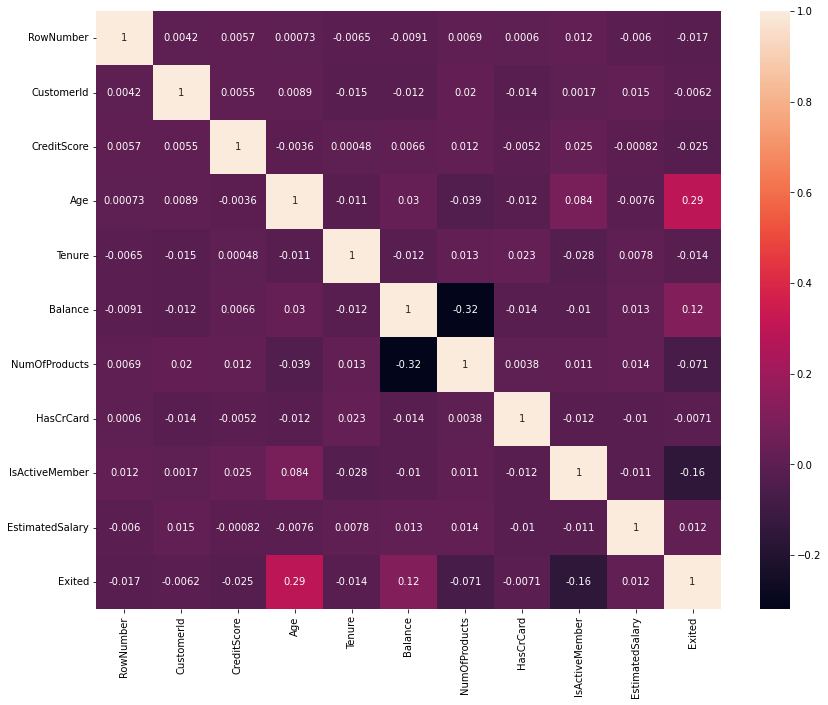

In [25]:

# df['Loan Status encoded']=np.where(df['Loan Status']=='Fully Paid',0,1)
# corrMatrix = df.corr()
# plt.figure(figsize = (12,9))
# ax=(sns.heatmap(corrMatrix, annot=True))
# plt.show()

fig, ax = plt.subplots(figsize=(14,11))

ax=(sns.heatmap(df.corr(), annot=True))

chisquare test
https://www.youtube.com/watch?v=misMgRRV3jQ&ab_channel=MathMeeting

# Categorical vs Categorical

Chi Square p value = 2.2482100097131755e-26


Gender  Female  Male
Exited              
0         3404  4559
1         1139   898

Gender    Female      Male
Exited                    
0       0.427477  0.572523
1       0.559156  0.440844

<AxesSubplot:xlabel='Gender', ylabel='Exited'>

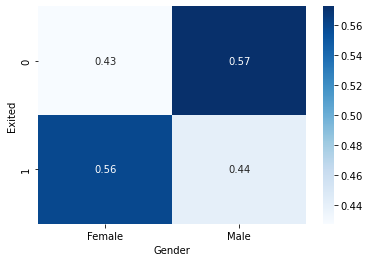

In [26]:
from scipy.stats import chisquare,chi2_contingency

v1=df['Exited']

# v2=df['Geography']
v2=df['Gender']
# g, p, dof, expctd=chi2_contingency(pd.crosstab(v1, v2))
print('Chi Square p value =' , chi2_contingency(pd.crosstab(v1, v2))[1])

display(pd.crosstab(v1, v2))
display(pd.crosstab(v1, v2,normalize='index'))
# sns.heatmap(pd.crosstab(v1, v2), annot=True)
sns.heatmap(pd.crosstab(v1, v2,normalize='index'), annot=True,cmap="Blues")


# Categorical vs Numerical

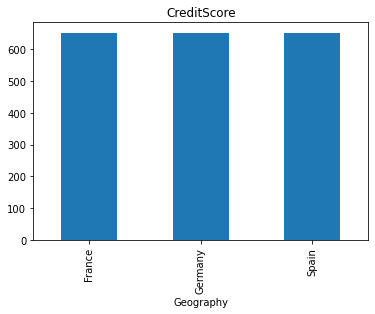

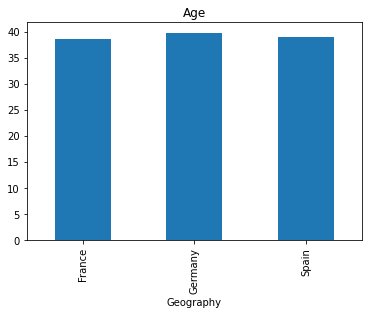

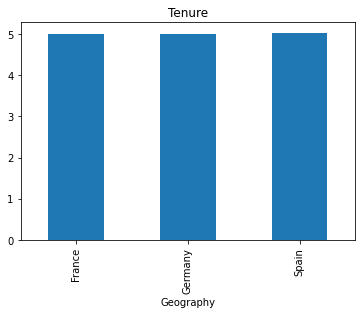

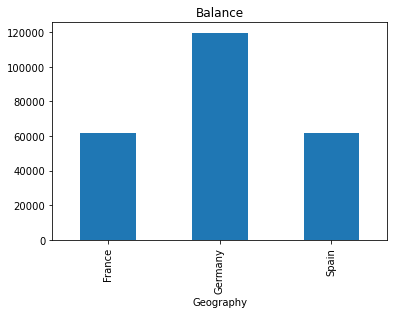

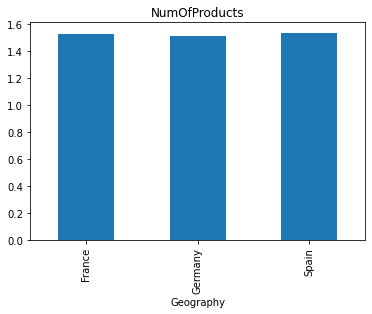

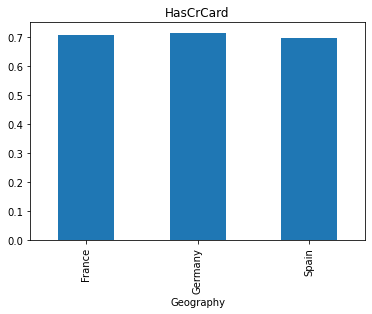

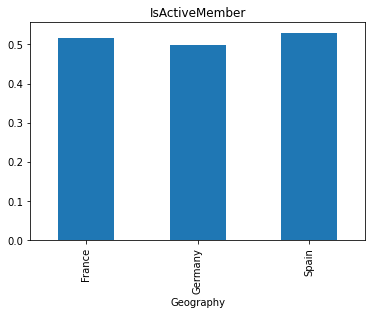

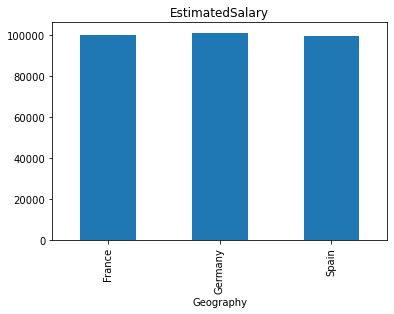

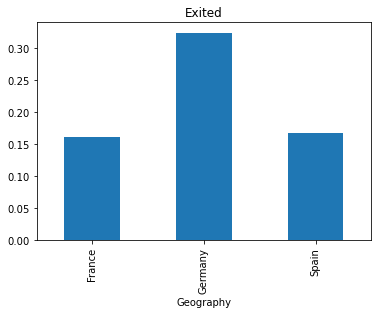

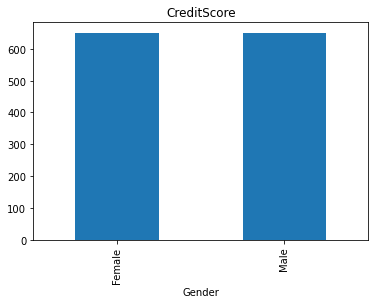

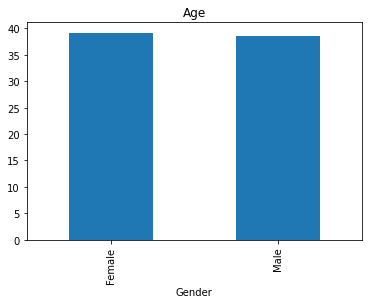

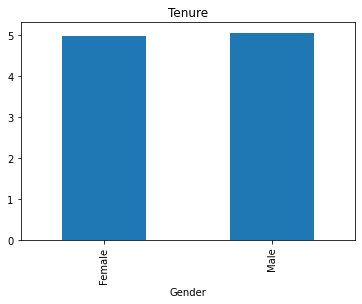

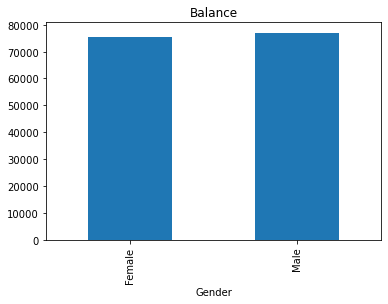

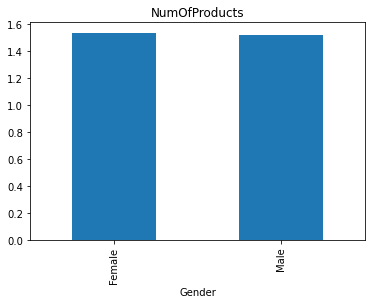

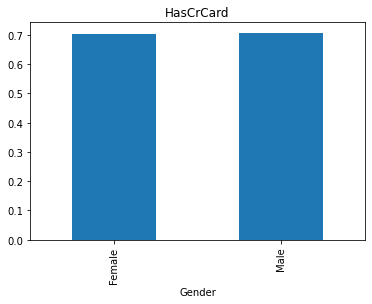

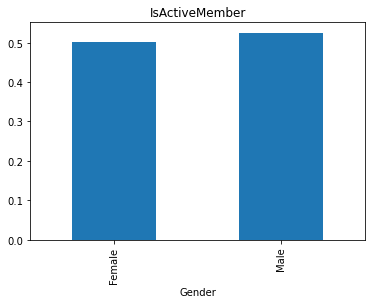

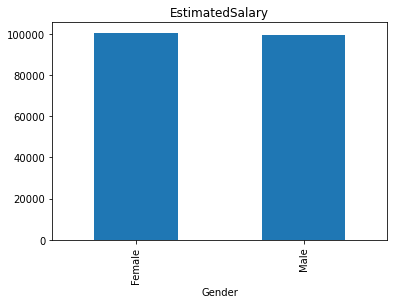

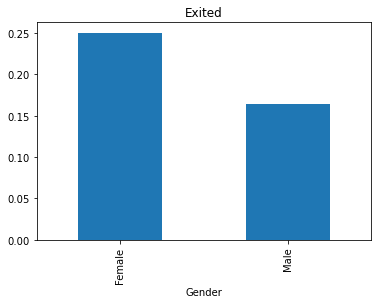

In [27]:
for cat_col in cat_cols:
    for num_col in num_cols:    
        df.groupby(cat_col)[num_col].mean().plot(kind='bar',title=num_col)
        plt.show()    


# Logestic Regression/Modeling

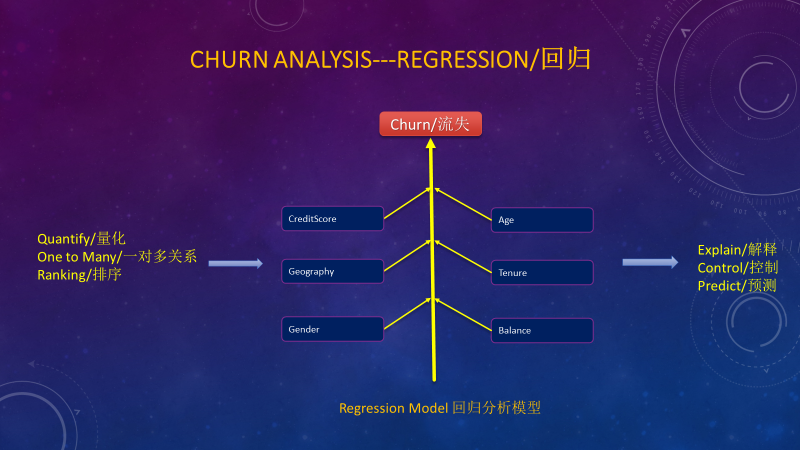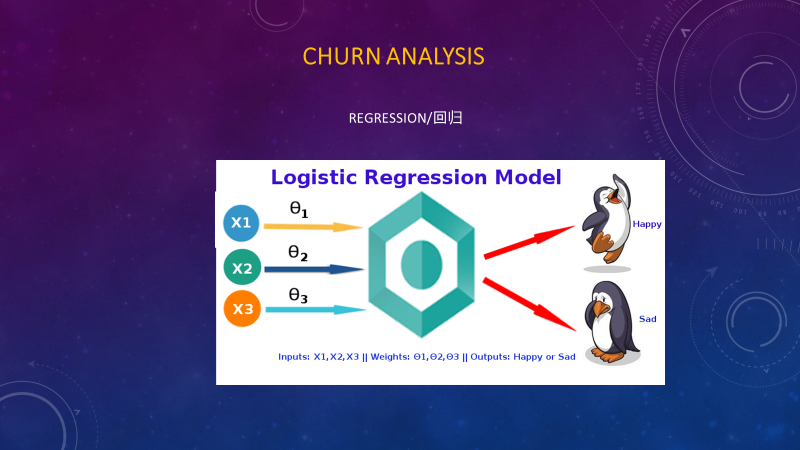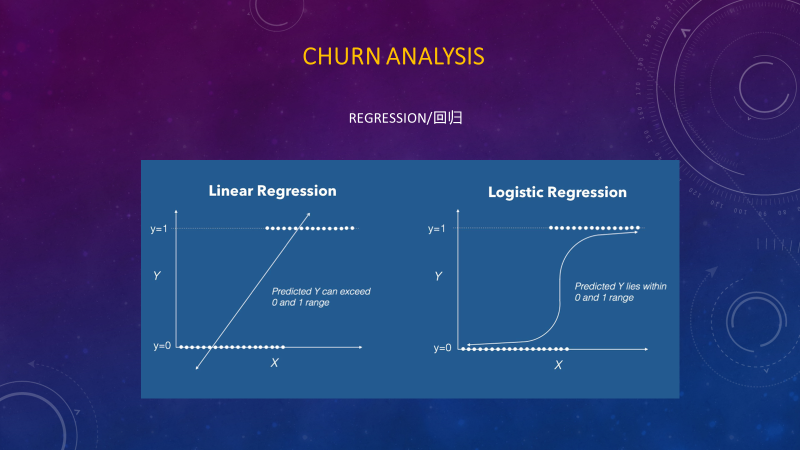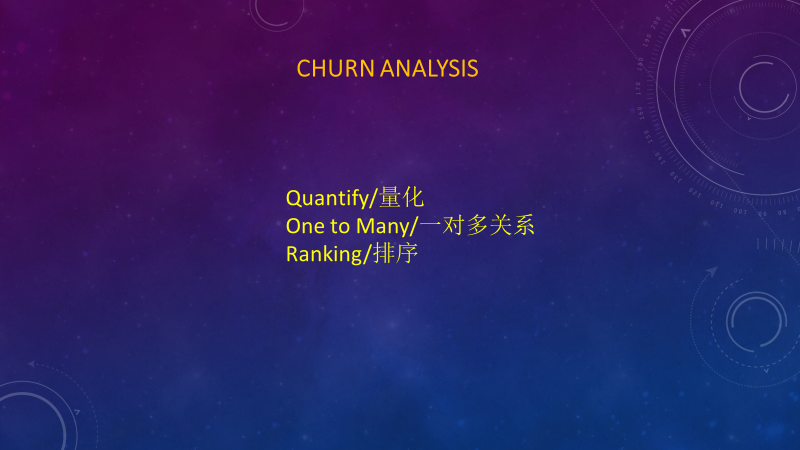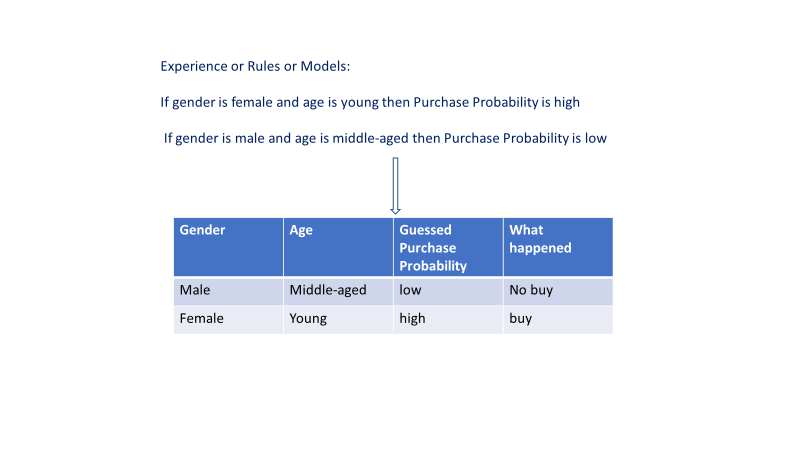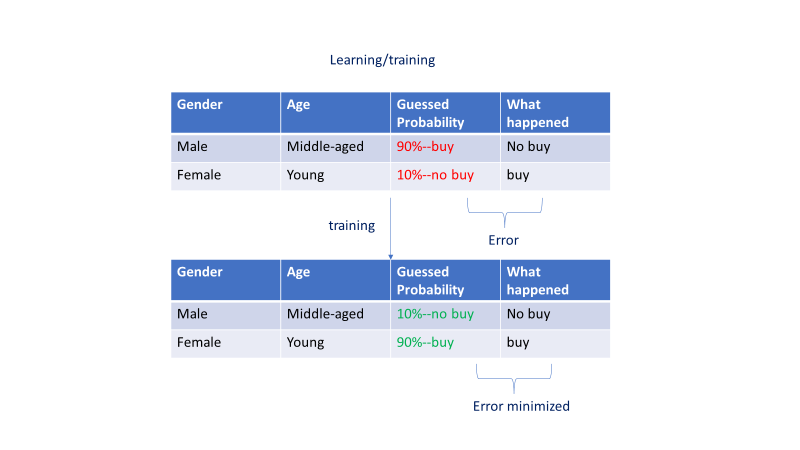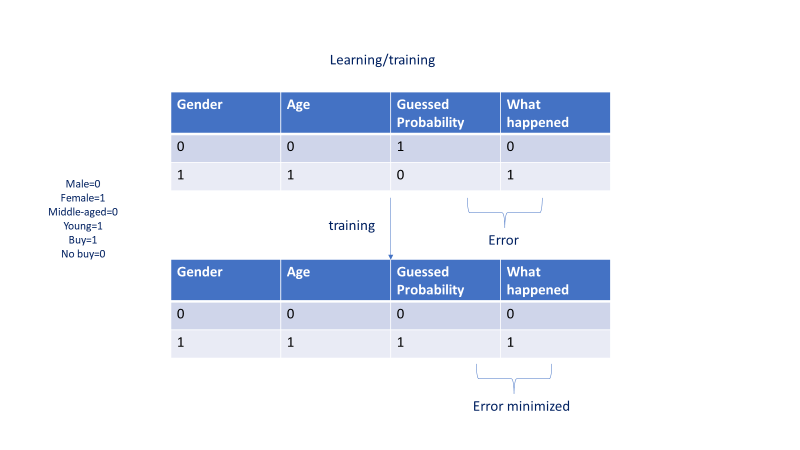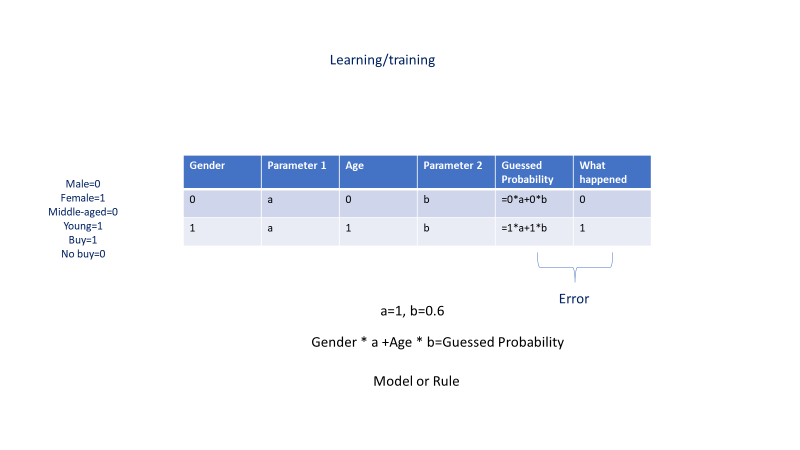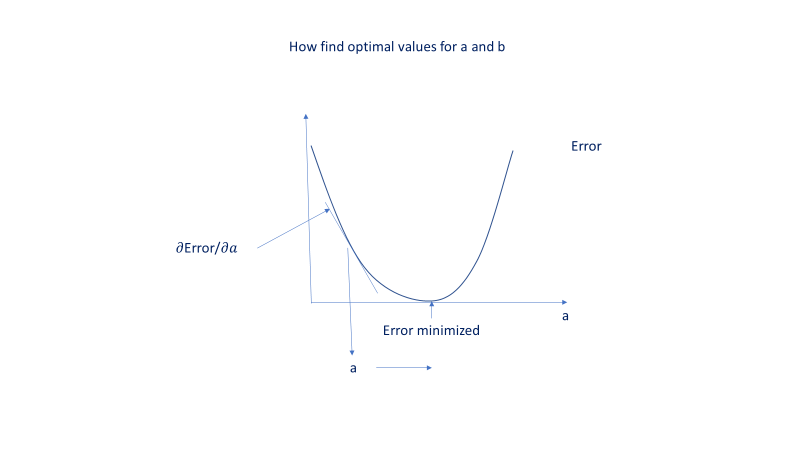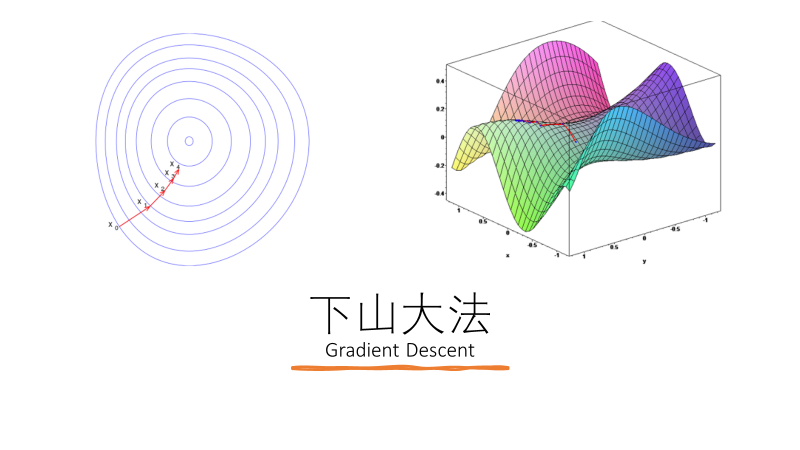

## Data processing and cleaning

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [29]:
import pyodbc
import urllib
import sqlalchemy

'''connect to datahub'''

params_datahub = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
                                 "SERVER=localhost\SQLEXPRESS;"
                                 "DATABASE=datahub;"
                                 "UID=sa;"
                                 "PWD=user1")

engine_datahub = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params_datahub))

In [30]:
df=pd.read_sql_table(r"marketing_churn",engine_datahub)
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography Gender  Age  Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
0          7    15592531  Bartlett          822    France   Male   50       7      0.0              2          1               1         10062.80       0
1         21    15577657  McDonald          732    France   Male   41       8      0.0              2          1               1        170886.17       0
2         77    15614049        Hu          664    France   Male   55       8      0.0              2          1               1        139161.64       0
3         94    15640635     Capon          769    France   Male   29       8      0.0              2          1               1        172290.61       0
4        142    15724944      Tien          663    France   Male   34       7      0.0              2          1               1        180427.24       0

### Numerical Variables

In [31]:

droplist='Surname'
cat_cols=df.select_dtypes(object).drop(droplist,axis=1).columns.tolist()

droplist=['RowNumber','CustomerId']
num_cols=df.select_dtypes('number').drop(droplist,axis=1).columns.tolist()

df[num_cols]=df[num_cols].clip(lower=df[num_cols].quantile(0.01), upper=df[num_cols].quantile(0.99),axis=1)

# df=df.query('`Attrition`.notnull()',engine='python')

In [32]:
#replace mnissing value with median, a better representation of the center of the data if it's not normally ditributed

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
for col in num_cols:
    df[col]=imputer.fit_transform(df[col].values.reshape(-1, 1))



### Categorical Variables

In [33]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for col in cat_cols:
    df[col]=imputer.fit_transform(df[col].values.reshape(-1, 1))

In [34]:
#encode the attribute
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop([each], axis=1)
    return df


# cat_cols.remove('Attrition')
df=one_hot(df,cat_cols)
df.head()

RowNumber  CustomerId   Surname  CreditScore   Age  Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_France  Geography_Germany  Geography_Spain  Gender_Female  Gender_Male
0          7    15592531  Bartlett        822.0  50.0     7.0      0.0            2.0        1.0             1.0         10062.80     0.0                 1                  0                0              0            1
1         21    15577657  McDonald        732.0  41.0     8.0      0.0            2.0        1.0             1.0        170886.17     0.0                 1                  0                0              0            1
2         77    15614049        Hu        664.0  55.0     8.0      0.0            2.0        1.0             1.0        139161.64     0.0                 1                  0                0              0            1
3         94    15640635     Capon        769.0  29.0     8.0      0.0            2.0        1.0             1.0        172290.61     0.0                 1                  0                0              0            1
4        142    15724944      Tien        663.0  34.0     7.0      0.0            2.0        1.0             1.0        180427.24     0.0                 1                  0                0              0            1

In [35]:
x_list = df.columns.tolist()
x_list = [e for e in x_list if e not in ('Exited','Surname','RowNumber','CustomerId')]
df[x_list]

CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  Geography_Spain  Gender_Female  Gender_Male
0           822.0  50.0     7.0       0.00            2.0        1.0             1.0         10062.80                 1                  0                0              0            1
1           732.0  41.0     8.0       0.00            2.0        1.0             1.0        170886.17                 1                  0                0              0            1
2           664.0  55.0     8.0       0.00            2.0        1.0             1.0        139161.64                 1                  0                0              0            1
3           769.0  29.0     8.0       0.00            2.0        1.0             1.0        172290.61                 1                  0                0              0            1
4           663.0  34.0     7.0       0.00            2.0        1.0             1.0        180427.24                 1                  0                0              0            1
...           ...   ...     ...        ...            ...        ...             ...              ...               ...                ...              ...            ...          ...
9995        750.0  38.0     5.0  151532.40            1.0        1.0             1.0         46555.15                 1                  0                0              0            1
9996        670.0  33.0     8.0  126679.69            1.0        1.0             1.0         39451.09                 1                  0                0              0            1
9997        739.0  58.0     2.0  101579.28            1.0        1.0             1.0         72168.53                 1                  0                0              0            1
9998        623.0  48.0     5.0  118469.38            1.0        1.0             1.0        158590.25                 1                  0                0              0            1
9999        516.0  35.0    10.0   57369.61            1.0        1.0             1.0        101699.77                 1                  0                0              0            1

[10000 rows x 13 columns]

In [36]:
#For better performance use MinMaxScaler to scale and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_x =pd.DataFrame(scaler.fit_transform(df[x_list]),columns=x_list)

In [37]:
#double check the data to see if there is any missing values and all categorical attributes have been encoded.
df_x

CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  Geography_Spain  Gender_Female  Gender_Male
0        0.933014  0.568627     0.7  0.000000            0.5        1.0             1.0         0.041890               1.0                0.0              0.0            0.0          1.0
1        0.717703  0.392157     0.8  0.000000            0.5        1.0             1.0         0.861469               1.0                0.0              0.0            0.0          1.0
2        0.555024  0.666667     0.8  0.000000            0.5        1.0             1.0         0.699796               1.0                0.0              0.0            0.0          1.0
3        0.806220  0.156863     0.8  0.000000            0.5        1.0             1.0         0.868626               1.0                0.0              0.0            0.0          1.0
4        0.552632  0.254902     0.7  0.000000            0.5        1.0             1.0         0.910091               1.0                0.0              0.0            0.0          1.0
...           ...       ...     ...       ...            ...        ...             ...              ...               ...                ...              ...            ...          ...
9995     0.760766  0.333333     0.5  0.814831            0.0        1.0             1.0         0.227860               1.0                0.0              0.0            0.0          1.0
9996     0.569378  0.235294     0.8  0.681191            0.0        1.0             1.0         0.191657               1.0                0.0              0.0            0.0          1.0
9997     0.734450  0.725490     0.2  0.546219            0.0        1.0             1.0         0.358390               1.0                0.0              0.0            0.0          1.0
9998     0.456938  0.529412     0.5  0.637042            0.0        1.0             1.0         0.798807               1.0                0.0              0.0            0.0          1.0
9999     0.200957  0.274510     1.0  0.308492            0.0        1.0             1.0         0.508885               1.0                0.0              0.0            0.0          1.0

[10000 rows x 13 columns]

## Create the function to train the model, test it, and visualize the results

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score


                   
#splitting the principal training dataset to subtrain and subtest datasets
x_train, x_test, y_train, y_test = train_test_split(df_x, df['Exited'], test_size = .3)

from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

logit.fit(x_train, y_train)
predictions = logit.predict(x_test)
probabilities = logit.predict_proba(x_test)
    
print('Algorithm:', type(logit).__name__)
print("\nClassification report:\n", classification_report(y_test, predictions))
print("Accuracy Score:", accuracy_score(y_test, predictions))

Algorithm: LogisticRegression

Classification report:
               precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      2411
         1.0       0.56      0.20      0.30       589

    accuracy                           0.81      3000
   macro avg       0.70      0.58      0.60      3000
weighted avg       0.78      0.81      0.78      3000

Accuracy Score: 0.8126666666666666


In [39]:
#confusion matrix
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as py
conf_matrix = confusion_matrix(y_test, predictions)

trace=go.Heatmap(z = conf_matrix,x = ["0", "1"],y = ["0", "1"],showscale = False, colorscale = "Picnic")
fig = make_subplots()
fig.add_trace(trace)
py.iplot(fig)

In [40]:
column_df = pd.DataFrame(x_train.columns.tolist())
coefficients = pd.DataFrame(logit.coef_.ravel())
coef_sumry = (pd.merge(coefficients, column_df, left_index=True, 
                               right_index=True, how="left"))
coef_sumry.columns = ["coefficients", "features"]
coef_sumry = coef_sumry.sort_values(by = "coefficients", ascending=False)
display(coef_sumry)
trace = go.Bar(x = coef_sumry["features"], y = coef_sumry["coefficients"])


fig = make_subplots()
fig.add_trace(trace)
py.iplot(fig)

coefficients           features
1       3.827648                Age
9       0.500111  Geography_Germany
3       0.451504            Balance
11      0.265895      Gender_Female
7       0.232798    EstimatedSalary
5      -0.093226          HasCrCard
10     -0.188593    Geography_Spain
2      -0.218120             Tenure
12     -0.265880        Gender_Male
0      -0.299948        CreditScore
8      -0.311504   Geography_France
4      -0.490580      NumOfProducts
6      -1.088725     IsActiveMember

## Feed the parameters to the function created above
Split the data into train dataset and test dataset and use the Hyper Parameters obtained above to generate a Logistic Regression instance and execute the function.

In [41]:
help(LogisticRegression())

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

### Interpret the results:
<!-- An Accuracy Score of 0.96 on Test data is a very good score with 1 being perfect 100% correct prediction. 
From the confusion Matrix we know that out of 194 predictions, only 7 mistake. Area under curve(True Positive/ False Positive), 
another model performance metric which often is used for unbalanced samples, is 0.965, also near perfect. 
The Feature Importance chart  suggests that  Money_Values, PARA_B, PARA_A, Score and District_Loss are more powerful predictors for Risk. 
 -->
<!-- Overall we have a very good model that can predict Risk. -->

# Productization of your Insights/Recommendations

In [42]:
df=pd.read_sql_table(r"marketing_churn",engine_datahub)
df.head()


RowNumber  CustomerId   Surname  CreditScore Geography Gender  Age  Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
0          7    15592531  Bartlett          822    France   Male   50       7      0.0              2          1               1         10062.80       0
1         21    15577657  McDonald          732    France   Male   41       8      0.0              2          1               1        170886.17       0
2         77    15614049        Hu          664    France   Male   55       8      0.0              2          1               1        139161.64       0
3         94    15640635     Capon          769    France   Male   29       8      0.0              2          1               1        172290.61       0
4        142    15724944      Tien          663    France   Male   34       7      0.0              2          1               1        180427.24       0

In [43]:
df['probabily'] = logit.predict_proba(df_x)[:,1]
df.sort_values(by='probabily',ascending=False).head(50)


RowNumber  CustomerId         Surname  CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  probabily
7475       7500    15790113       Schofield          609   Germany  Female   71       6  113317.10              1          1               0        108258.22       1   0.915746
7672       9588    15653050         Norriss          719   Germany  Female   76      10   95052.29              1          1               0        176244.87       0   0.911419
7538       9556    15655360         Chikelu          782   Germany  Female   72       5  148666.99              1          1               0          2605.65       1   0.910447
7613       4816    15737647          Obioma          775   Germany  Female   77       6  135120.56              1          1               0         37836.64       0   0.909802
6903       7630    15591107        Flemming          723   Germany  Female   68       3  110357.00              1          0               0        141977.54       1   0.906397
7396       4436    15648967           Ch'en          698   Germany  Female   64       1  169362.43              1          1               0         84760.32       1   0.882252
7461       7009    15638610         Kennedy          635   Germany  Female   65       5  117325.54              1          1               0        155799.86       1   0.881308
4858       8489    15794360             Hao          592   Germany  Female   70       5   71816.74              2          1               0        105096.82       1   0.880278
6870       4560    15668248           Quinn          528   Germany  Female   62       7  133201.17              1          0               0        168507.68       1   0.876503
7899       8157    15785576       Mayrhofer          434   Germany    Male   71       9  119496.87              1          1               0        125848.88       0   0.875462
3828       9748    15775761   Iweobiegbunam          610   Germany  Female   69       5   86038.21              3          0               0        192743.06       1   0.869159
8368       3532    15653251          Hickey          408    France  Female   84       8   87873.39              1          0               0        188484.52       1   0.865222
7294        618    15766575       Larionova          612   Germany  Female   62       8  140745.33              1          1               0        193437.89       1   0.862036
6954       4397    15691119          Martin          721   Germany    Male   68       4  136525.99              1          0               0        175399.14       0   0.860741
7890       7693    15807889            Wood          634   Germany    Male   74       5  108891.70              1          1               0         10078.02       0   0.858857
7655       8189    15623314          Tucker          506   Germany  Female   59       3  190353.08              1          1               0         78365.75       0   0.853903
6820        417    15720559           Heath          487   Germany  Female   61       5  110368.03              1          0               0         11384.45       1   0.847597
7344       2474    15679249            Chou          351   Germany  Female   57       4  163146.46              1          1               0        169621.69       1   0.845481
7485       7814    15592751   Okwudiliolisa          684   Germany  Female   63       3   81245.79              1          1               0         69643.31       1   0.842032
4822       4752    15763256        Sheppard          661   Germany  Female   64       8  128751.65              2          1               0        189398.18       1   0.841315
3778       4464    15778975          Nnonso          850   Germany  Female   70       1   96947.58              3          1               0         62282.99       1   0.840521
8415       8099    15594391       Samaniego          770    France  Female   68       2  183555.24              

In [44]:
import pyodbc
import urllib
import sqlalchemy

'''connect to datahub'''

params_datahub = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
                                 "SERVER=localhost\SQLEXPRESS;"
                                 "DATABASE=datahub;"
                                 "UID=sa;"
                                 "PWD=user1")

engine_datahub = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params_datahub))
# df=df.drop('Purpose_other',axis=1)
df.to_sql('Marketing_prediction',engine_datahub,if_exists='replace',index=False)